In [1]:
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt
import folium
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.10/site-packages/osmnx/projection.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shape

In [60]:
places = ['Central Administrative Okrug',
 'Northern Administrative Okrug',
 'North-Eastern Administrative Okrug',
 'Eastern Administrative Okrug',
 'South-Eastern Administrative Okrug',
 'Southern Administrative Okrug',
 'South-Western Administrative Okrug',
 'Western Administrative Okrug',
 'North-Western Administrative Okrug',
 'Zelenogradsky Administrative Okrug',
 'Novomoskovsky Administrative Okrug',
 'Troitsky Administrative Okrug']
local_crs = 32637

In [61]:
place = places[1] + ', Moscow'

In [69]:
check = ox.geocoder.geocode_to_gdf(place).to_crs(local_crs).reset_index()
check

,index,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,0,"MULTIPOLYGON (((395755.950 6199977.191, 395887...",55.95729,55.759846,37.588633,37.33132,298025745,relation,162903,55.833814,37.525802,"Northern Administrative Okrug, Moscow, Central...",boundary,administrative,0.812424


In [63]:
bus_stops = ox.geometries_from_place(place, tags={'amenity' : 'bus_station', 'public_transport':'stop_position'}).to_crs(local_crs).reset_index()

In [64]:
list(bus_stops.columns)

['element_type',
 'osmid',
 'name',
 'name:en',
 'public_transport',
 'railway',
 'train',
 'geometry',
 'bus',
 'old_name',
 'layer',
 'wikidata',
 'wikipedia',
 'name:be',
 'name:ru',
 'tactile_paving',
 'subway',
 'tram',
 'alt_name',
 'description',
 'operator',
 'bench',
 'shelter',
 'colour',
 'name:uk',
 'network',
 'route_ref',
 'transport',
 'fixme',
 'highway',
 'short_name',
 'note',
 'local_ref',
 'official_name',
 'name:fr',
 'name:ka',
 'name:pl',
 'survey:date',
 'alt_name:be',
 'alt_name:ru',
 'name:cs',
 'name:it',
 'name:ko',
 'name:pt',
 'amenity',
 'opening_hours',
 'location',
 'addr:city',
 'addr:street',
 'name:de',
 'nodes',
 'surface',
 'addr:housenumber',
 'building',
 'building:levels',
 'phone',
 'website']

In [65]:
lst = ['element_type',
 'osmid',
 'name',
 'public_transport',
 'geometry',
 ]

In [66]:
bus_stops[lst].head()

,element_type,osmid,name,public_transport,geometry
0,node,50484373,"Пляж ""Динамо""",stop_position,POINT (405072.451 6188779.106)
1,node,50487729,"Пляж ""Динамо""",stop_position,POINT (405093.051 6188784.768)
2,node,50488052,Пулковская улица,stop_position,POINT (404699.779 6189792.502)
3,node,143427820,Дегунино,stop_position,POINT (410700.100 6192076.831)
4,node,230988275,Окружная,stop_position,POINT (410717.320 6190026.304)


In [67]:
clinics = ox.geometries_from_place(place, tags={'amenity' : 'clinic'}).to_crs(local_crs).reset_index()

<Axes: >

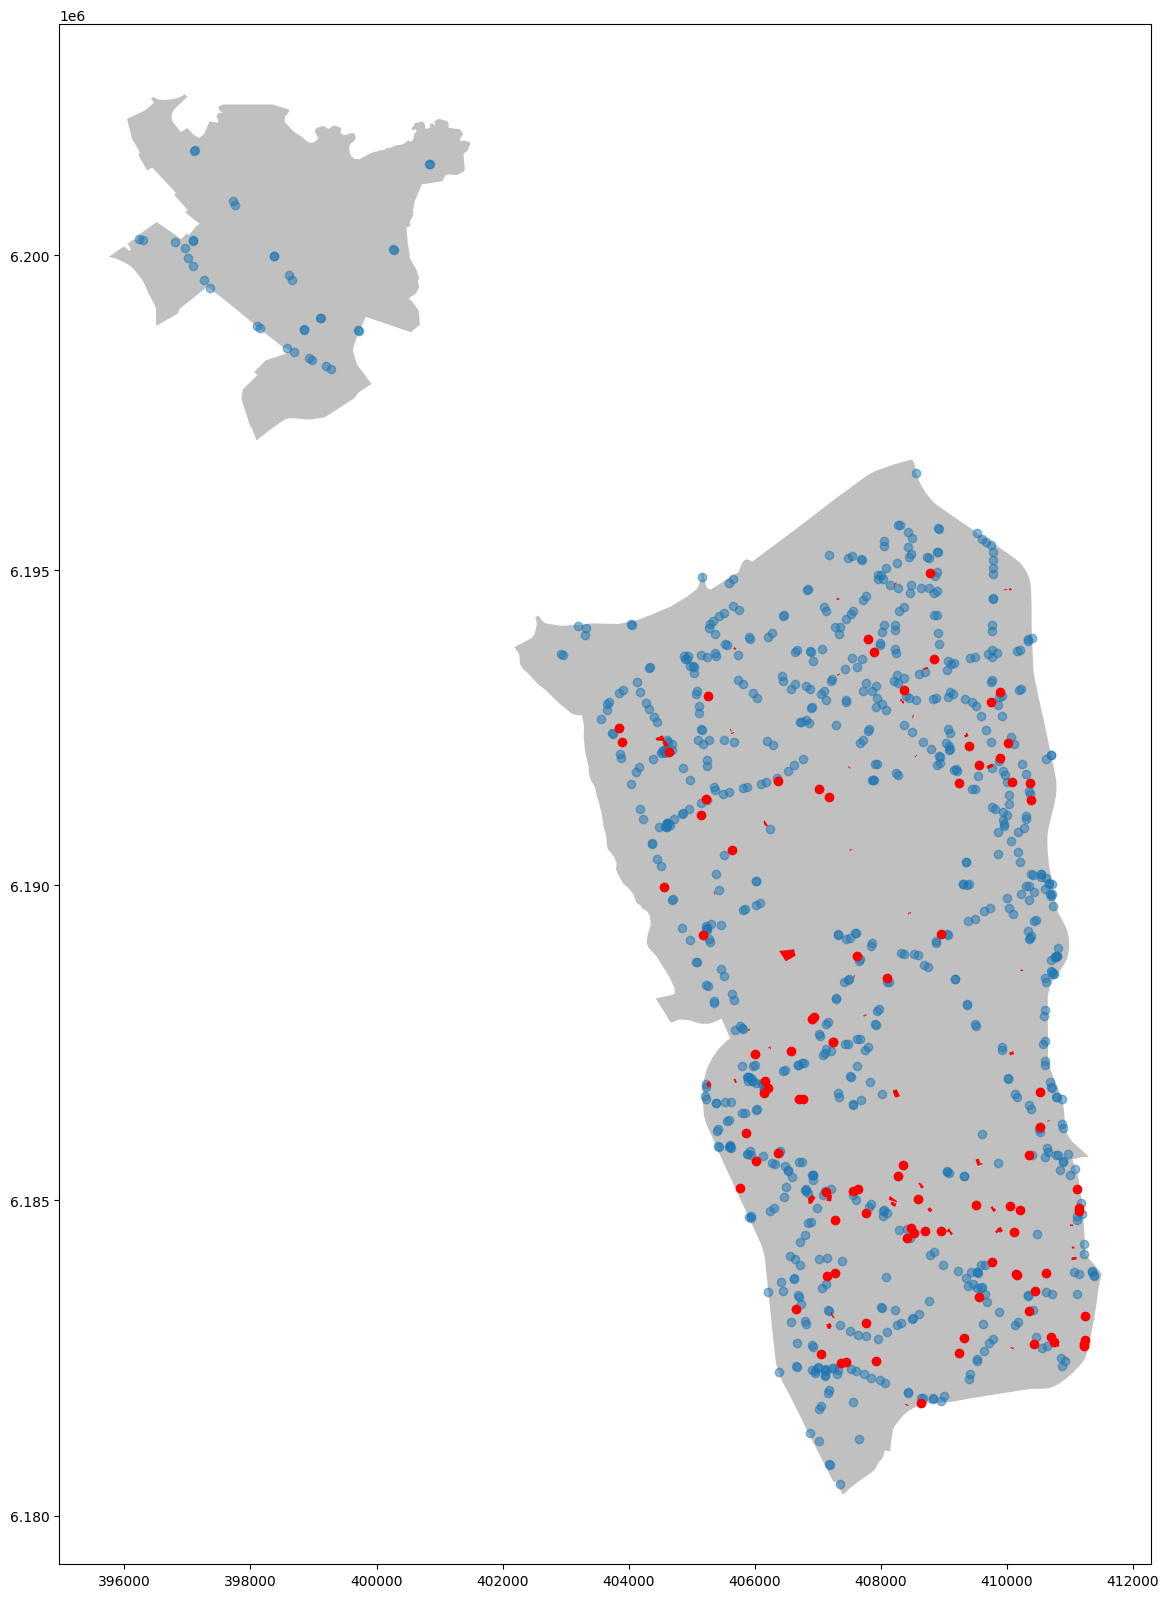

In [73]:
ax = check.plot(figsize=(20,20), color='silver')
bus_stops.plot(ax=ax, alpha=0.5)
clinics.plot(ax=ax, color='red')


In [ ]:
# G_w = ox.graph_from_address(place, retain_all=True, network_type='walk', 
#                             simplify=True, clean_periphery=False)

In [ ]:
# fig, ax = ox.plot_graph(G_w, node_zorder=2, node_color='w', bgcolor='k')

In [ ]:
# ox.plot_graph_folium(G_w, popup_attribute='name', edge_width=2)
